# Многокритериальная оптимизация

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np 
import pandas as pd

from collections import defaultdict
pd.options.mode.chained_assignment = None  # default='warn'

### Построить модель транстпортно-логистической сети в виде многовзвешенного орграфа.

#### Построить граф с 20 вершинами. 

In [2]:
edges_list = [(1, 2), (1, 3), (1, 4), (2, 3), 
              (2, 6), (3, 5), (5, 6), (6, 7), (4, 6),
              (5, 9), (6, 7), (7, 9), (9, 10)]

weighs = [(8, 8), (6, 9), (9, 8), (7, 5), 
          (9, 9), (7, 9), (1, 1), (1, 1),(7, 7),
          (14, 12), (8, 11), (6, 1), (4, 4)]

G = nx.DiGraph()
G.add_edges_from(edges_list)

In [6]:
for idx, e in enumerate(edges_list):
    G[e[0]][e[1]]['cost'] = weighs[idx][0]
    G[e[0]][e[1]]['time'] = weighs[idx][1]

labels_cost = nx.get_edge_attributes(G, "cost")
labels_time = nx.get_edge_attributes(G, "time")
labels = defaultdict(list)

for label in (labels_cost, labels_time):
    for key, value in label.items():
        labels[key].append(value)

#### Распределить случайным образом (от 1 до 10) веса (c, t), где c — стоимость перевозки, а t — её время. 

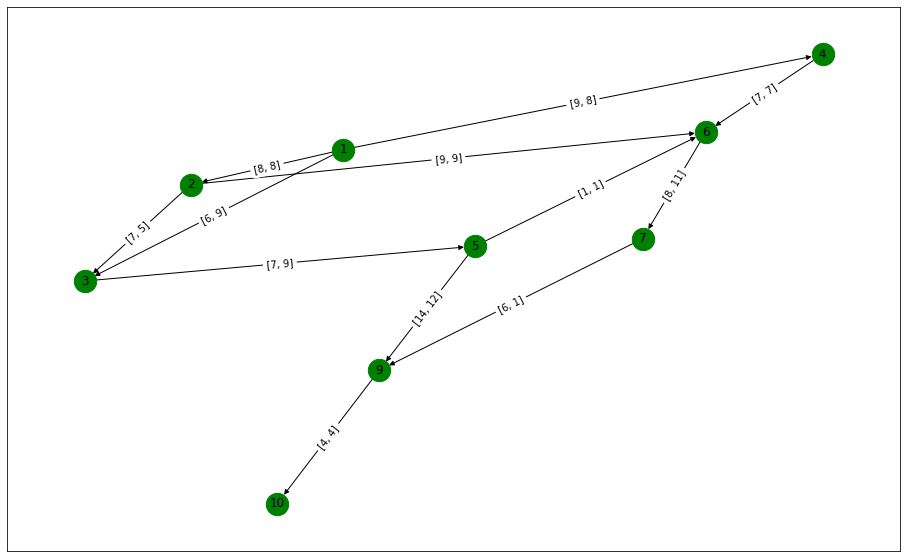

In [8]:
plt.figure(figsize = (16, 10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color='green', with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
print()

### Указать точку отправки и точку доставки.

In [9]:
# точки отправки и доставки
start_node, end_node = 1, 10

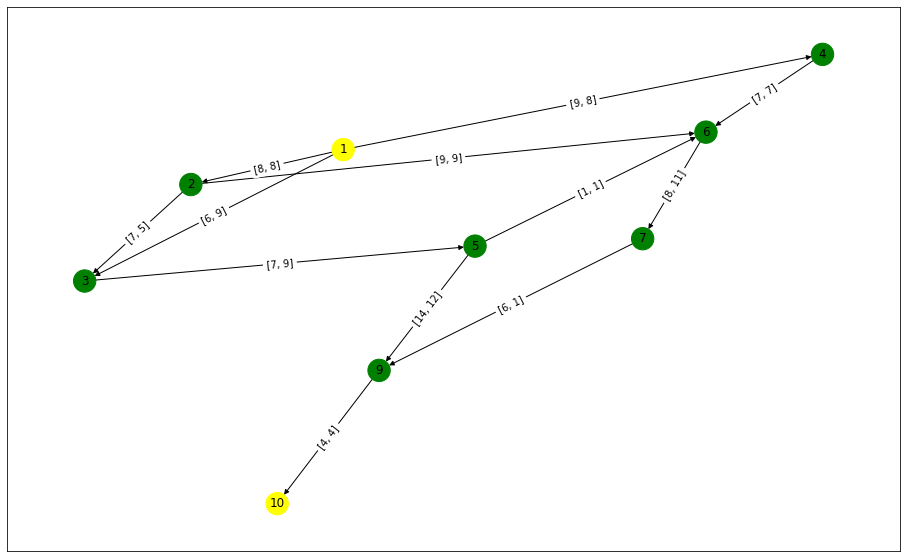

In [10]:
plt.figure(figsize = (16, 10))
color_map = []
for node in G:
    if node in [start_node, end_node]:
        color_map.append('yellow')
    else: 
        color_map.append('green')     
nx.draw_networkx(G, pos, node_color=color_map, with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
print()

### Найти паретовское множество решений.

Поиск множества альтернатив (множества всех допустимых решений).   
В представленном решении данное множество является множеством всех путей, соединяющих две конечные вершины  

In [11]:
simple_paths = list(nx.all_simple_paths(G, start_node, end_node))
all_paths = np.array([])
all_paths =([[path_, nx.path_weight(G, path_, weight='cost'), 
  nx.path_weight(G, path_, weight='time')] for path_ in simple_paths])

In [12]:
all_paths_pd = pd.DataFrame(all_paths, columns=['path', 'cost', 'time'])
# all_paths_pd_ = all_paths_pd[(all_paths_pd['cost'] < 80) & (all_paths_pd['time'] < 80)]

print(f'Всего обнаружено путей: {all_paths_pd.shape[0]}')

Всего обнаружено путей: 6


Обнаружено более 300000 вариантов путей. Самые "дорогие" были убраны, и таким образом было сокращено количество путей до 254.

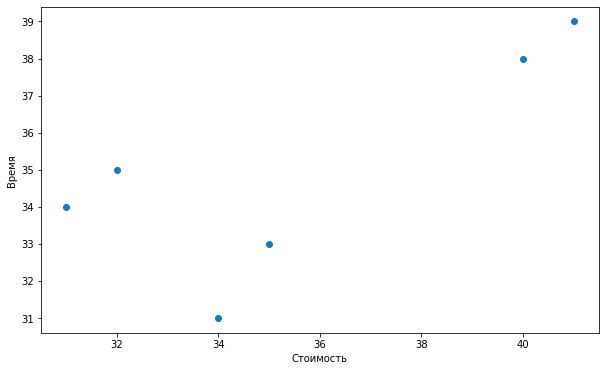

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(all_paths_pd.cost, all_paths_pd.time)
plt.xlabel("Стоимость")
plt.ylabel("Время")

plt.show()

Анализируется график и выбирается область Парето. На графике видно, что это область, где время < 27 и цена < 20

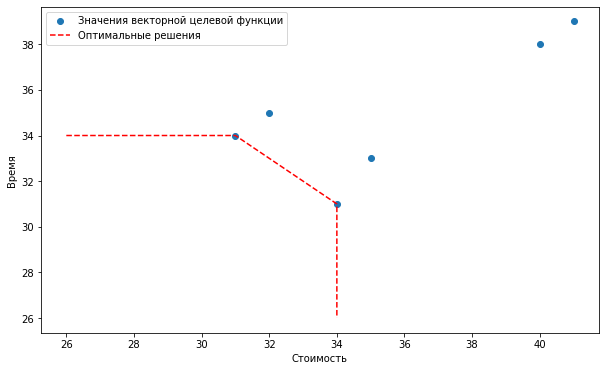

In [15]:
pareto = all_paths_pd
pareto['summ'] = pareto.cost + pareto.time
pareto = pareto.sort_values(by='summ')
        

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(all_paths_pd.cost, all_paths_pd.time, label='Значения векторной целевой функции')
plt.xlabel("Стоимость")
plt.ylabel("Время")

# нарисовать кривую Парето

pareto_ = pareto[:2]
pareto_cost = pareto_.cost.to_list()
pareto_time = pareto_.time.to_list()
pareto_cost.insert(0, all_paths_pd['cost'].min() - 5)
pareto_time.insert(0, pareto_.iloc[0].time)
pareto_cost.append(pareto_.sort_values(by='time').iloc[0].cost)
pareto_time.append(all_paths_pd['time'].min() - 5)

plt.plot(pareto_cost, pareto_time, color='red', ls='--', label='Оптимальные решения')
plt.legend()
plt.show()

Вывод доминирующих решений.

In [16]:
# вывод путей (path), их цена (cost) и стоимость (price)
for idx, (i, v) in enumerate(pareto.iterrows()):
    print(f'Путь {idx+1} -> {v.path} \n стоимость: {v.cost}, время: {v.time}, {v.summ}, кол-во промежуточных вершин: {len(v.path)-2}\n')

Путь 1 -> [1, 3, 5, 9, 10] 
 стоимость: 31, время: 34, 65, кол-во промежуточных вершин: 3

Путь 2 -> [1, 4, 6, 7, 9, 10] 
 стоимость: 34, время: 31, 65, кол-во промежуточных вершин: 4

Путь 3 -> [1, 3, 5, 6, 7, 9, 10] 
 стоимость: 32, время: 35, 67, кол-во промежуточных вершин: 5

Путь 4 -> [1, 2, 6, 7, 9, 10] 
 стоимость: 35, время: 33, 68, кол-во промежуточных вершин: 4

Путь 5 -> [1, 2, 3, 5, 9, 10] 
 стоимость: 40, время: 38, 78, кол-во промежуточных вершин: 4

Путь 6 -> [1, 2, 3, 5, 6, 7, 9, 10] 
 стоимость: 41, время: 39, 80, кол-во промежуточных вершин: 6

